In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MSc_project/.MAIN

In [4]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
from scipy.spatial import distance
import math


import os
# os.chdir('G:\My Drive\MSc_project\.MAIN')


# Hashtag

In [ ]:
# all_udf.to_csv('multisource_analysis/score_db/best_informer_user_breakdown.csv')
all_udf = pd.read_csv('multisource_analysis/score_db/ALL_BEST_FEATURES.csv')
cols = all_udf.columns.to_list()
[ cols.remove(x) for x in ['Unnamed: 0']]
[ cols.remove(x) for x in ['is-infector','is-informer','is-target', 'hashtag']]
[ cols.remove(x) for x in cols if 'count' in x ]
cols = [ x for x in cols if 'user' in x]

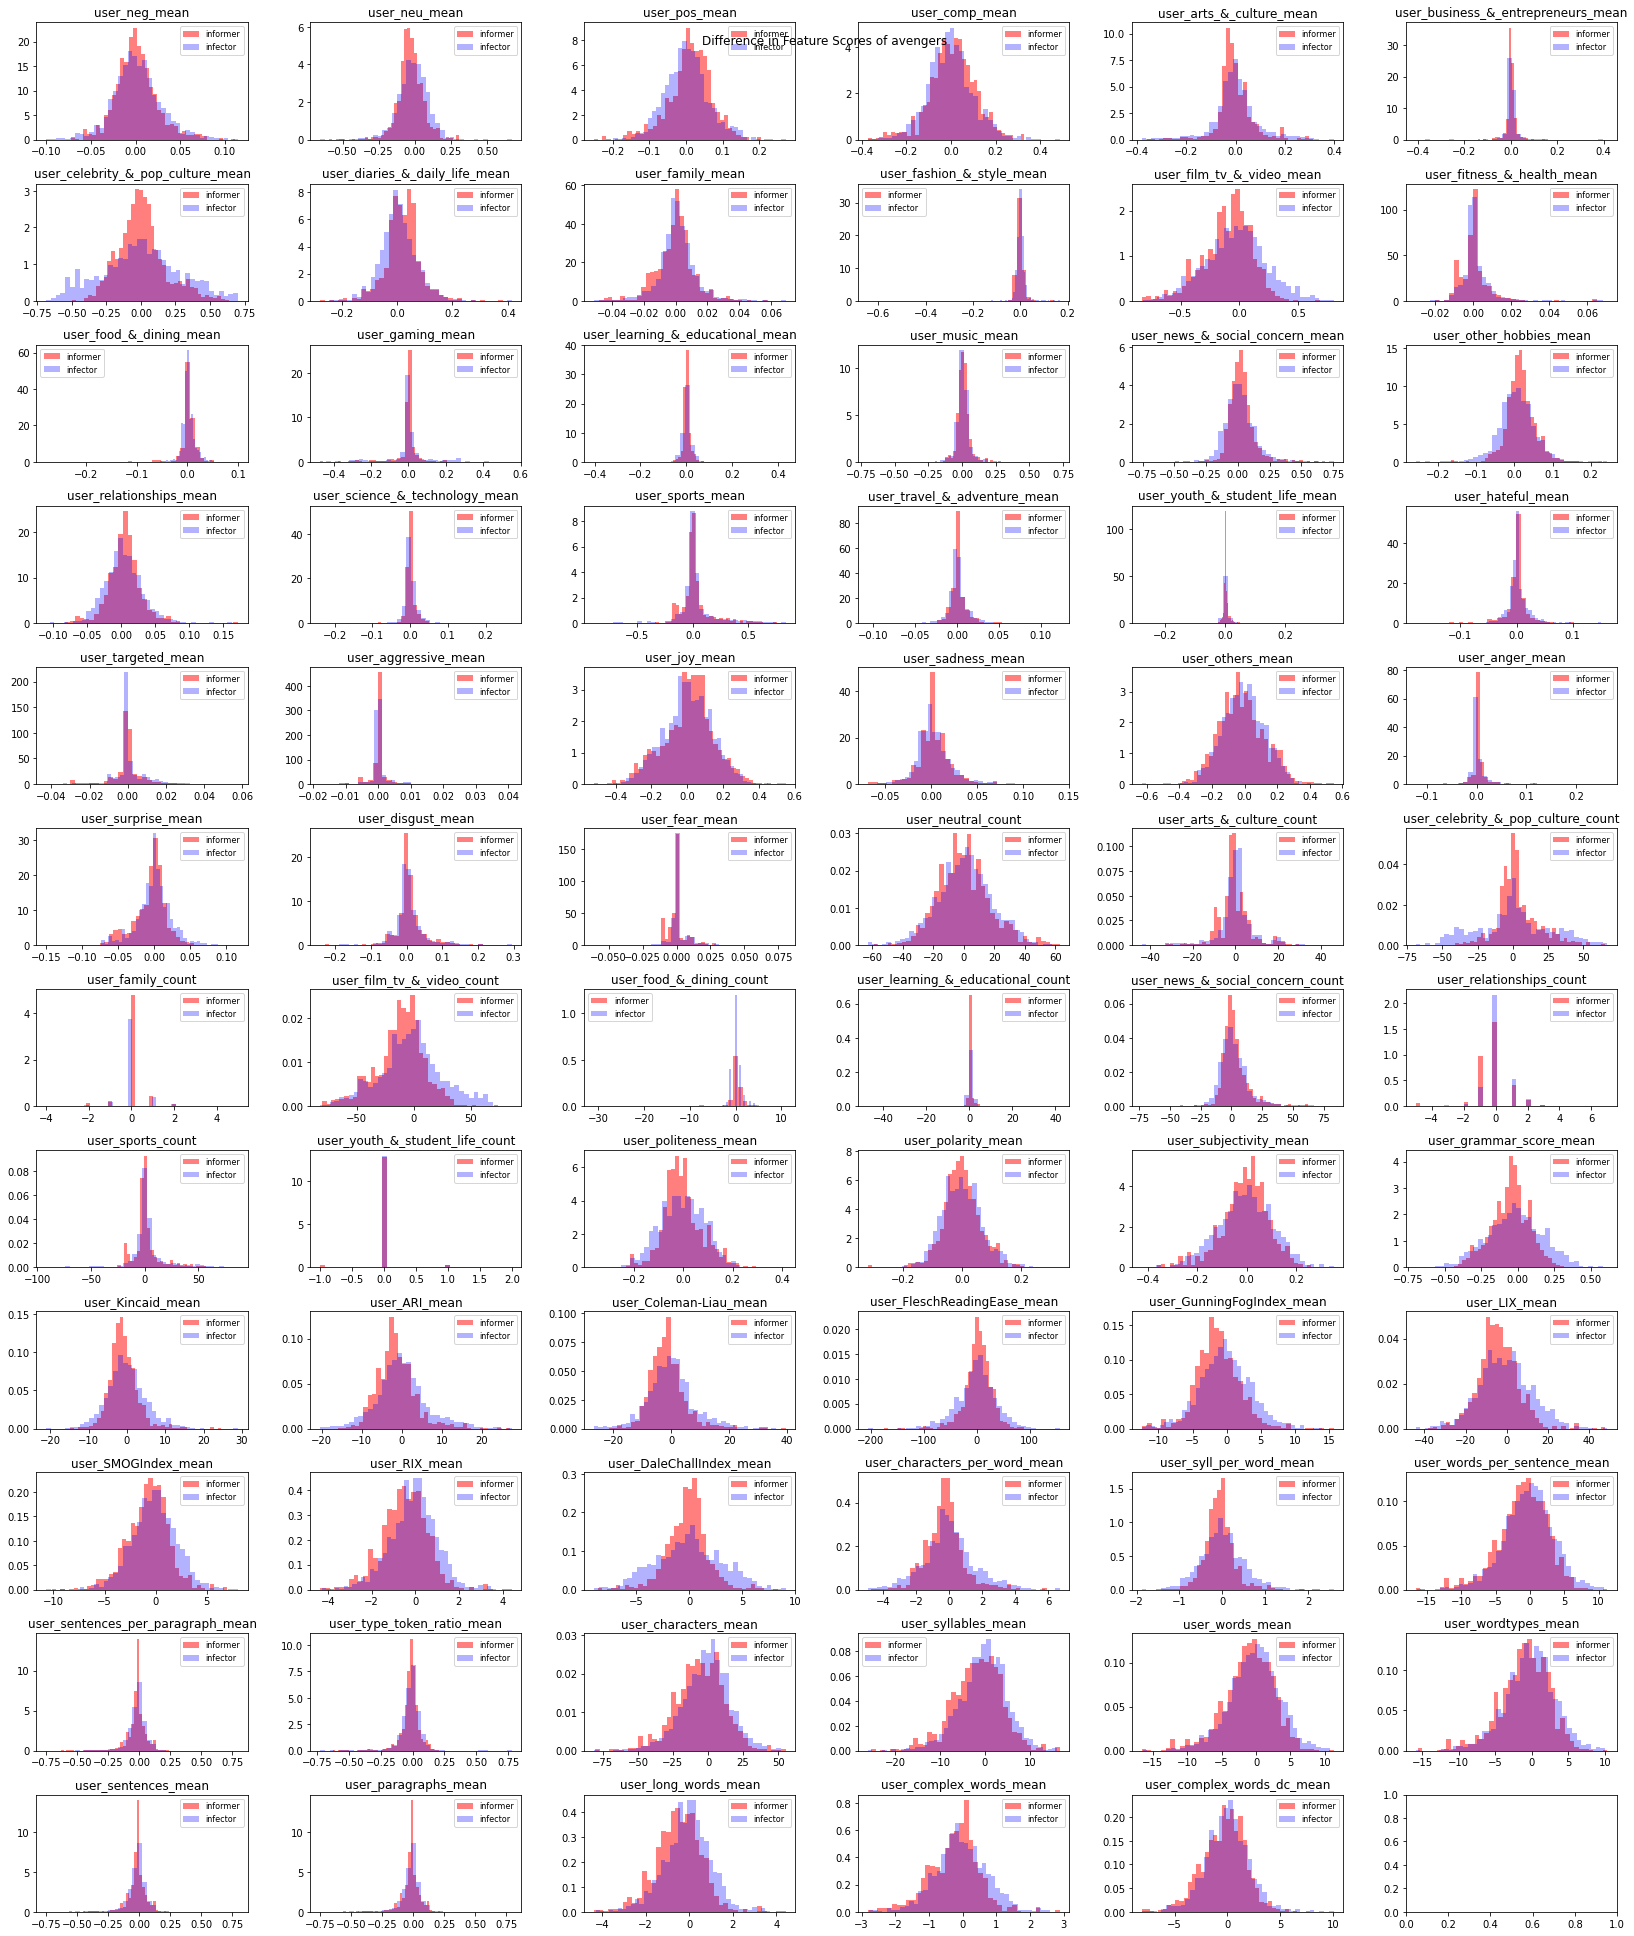

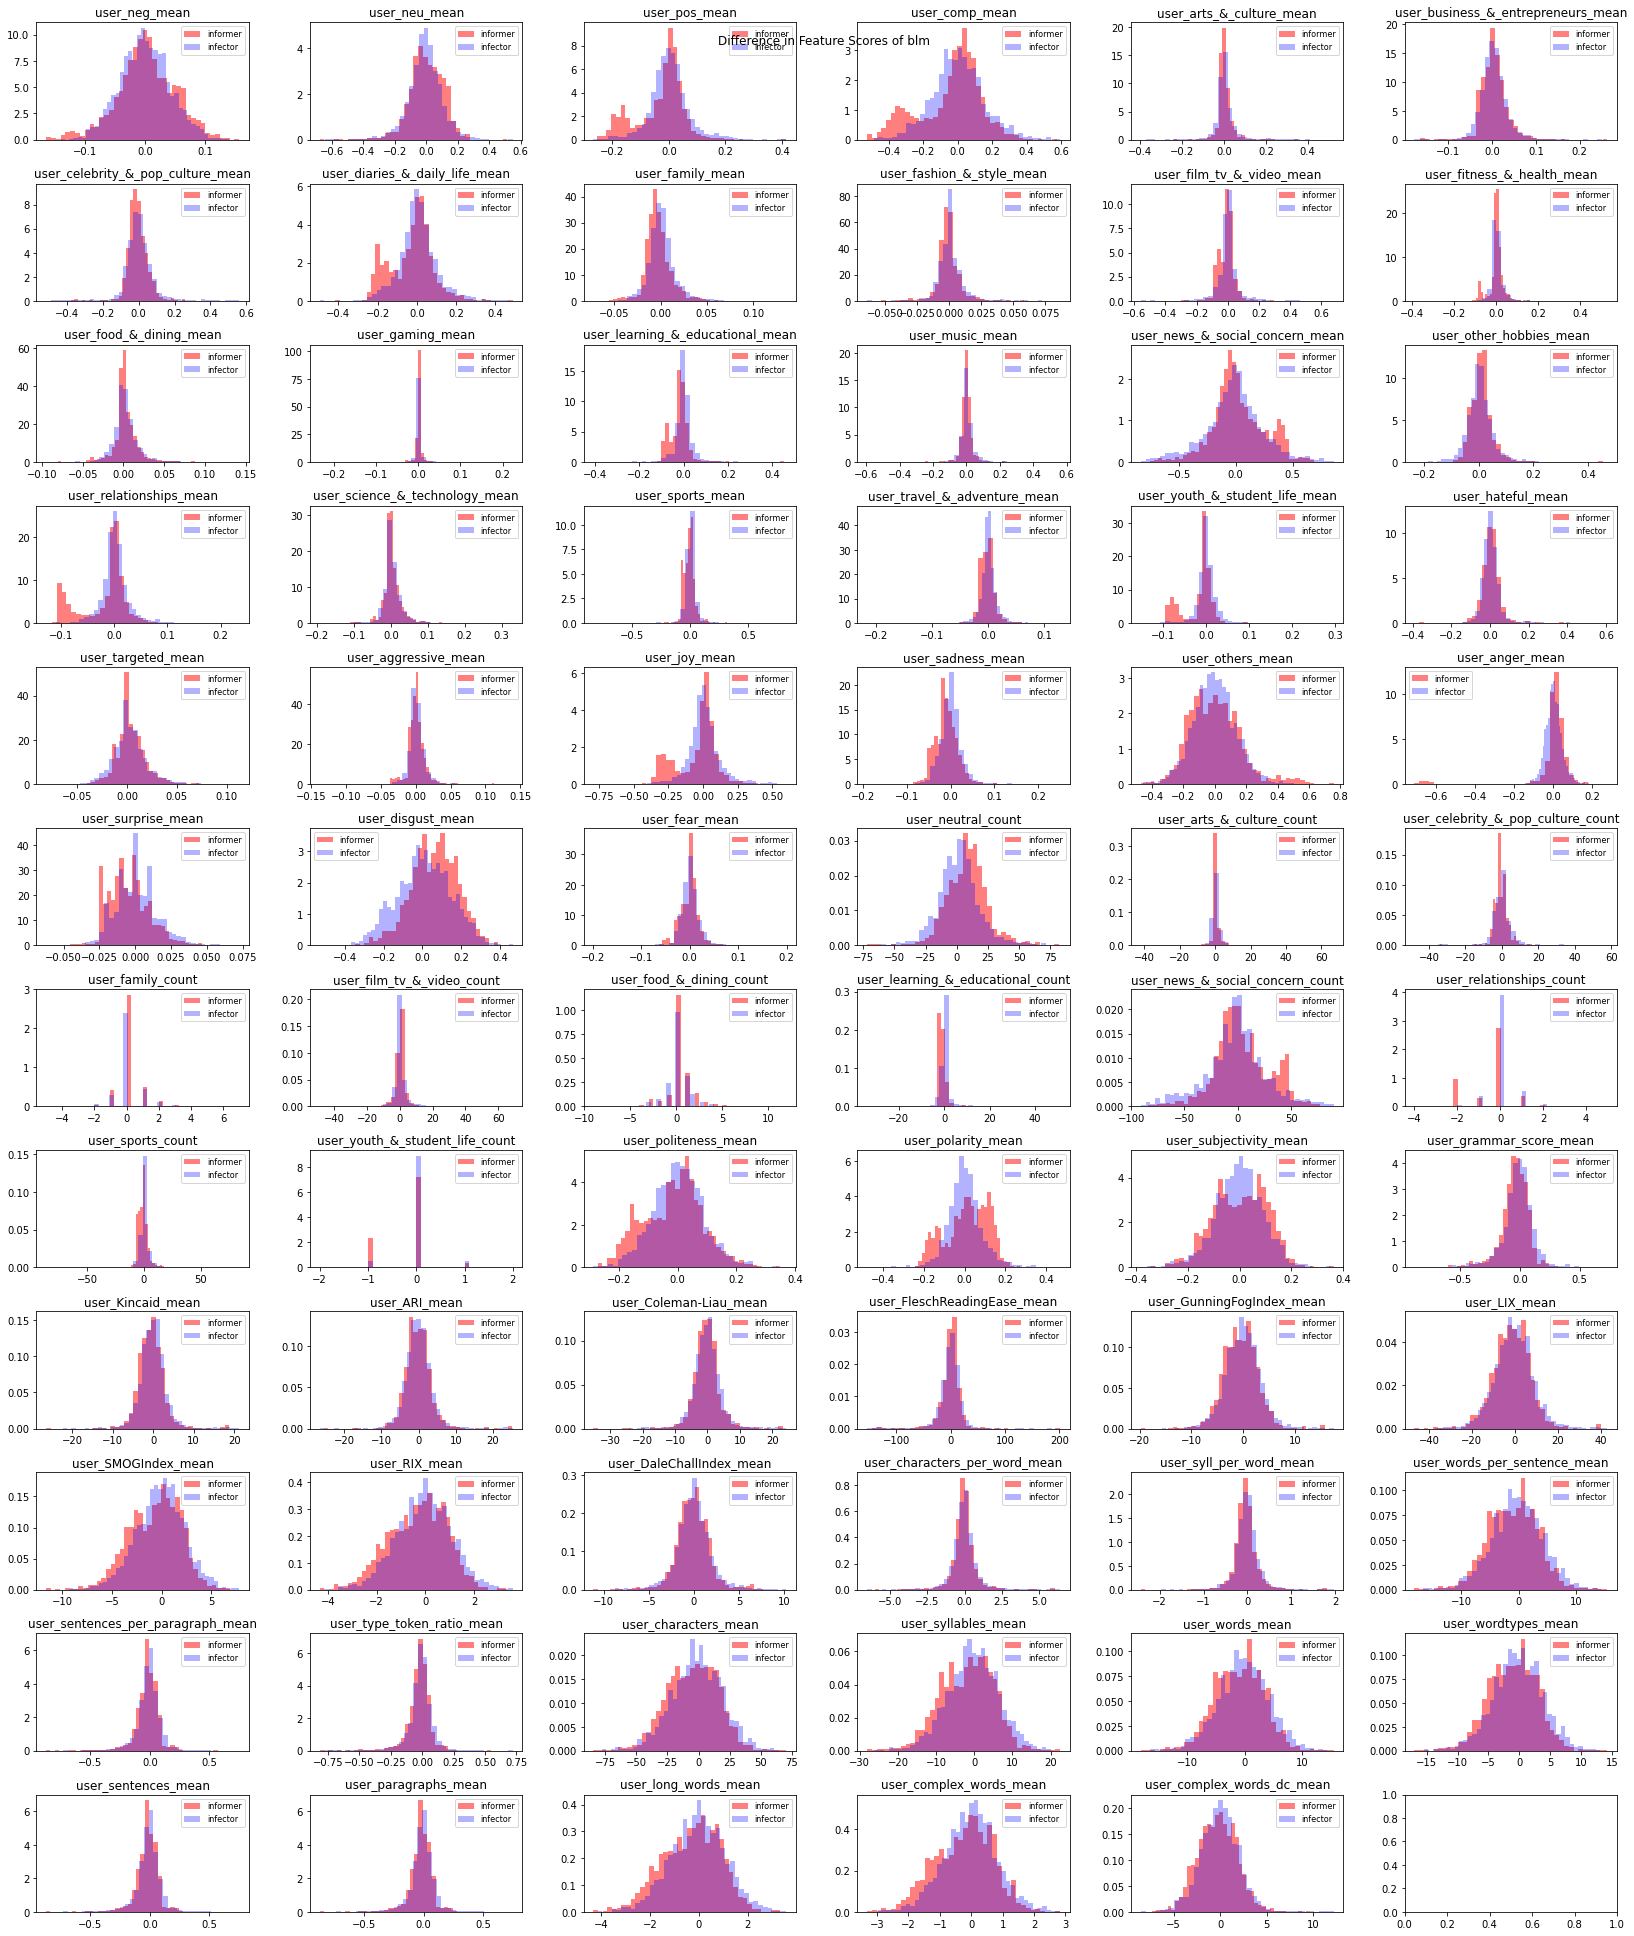

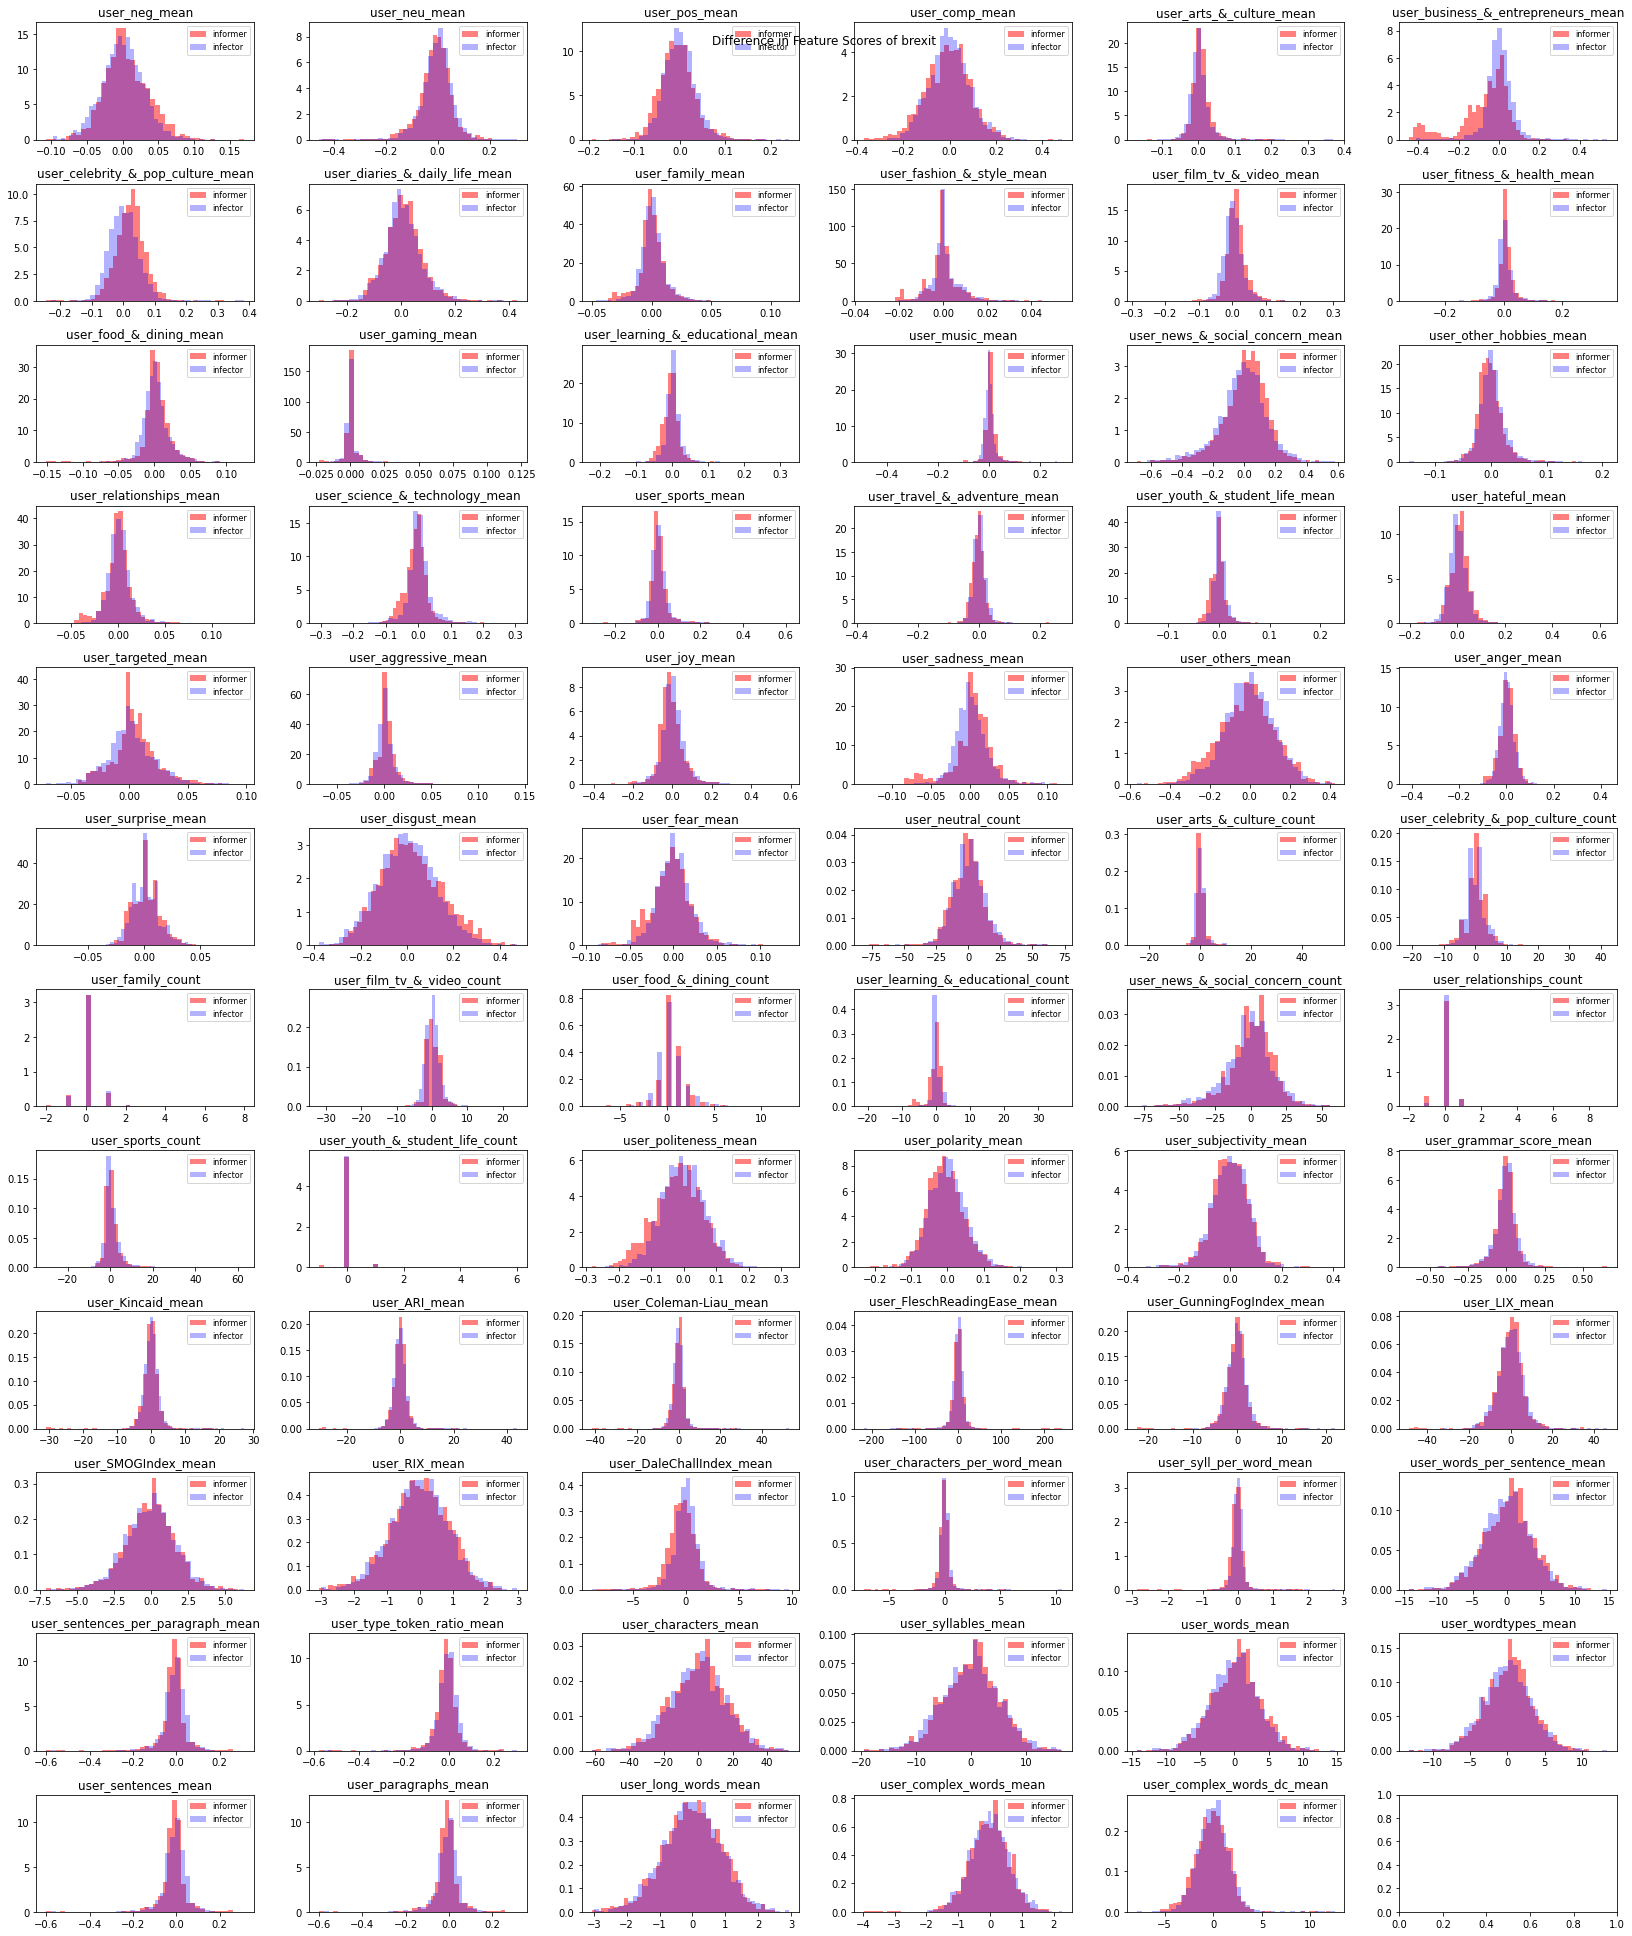

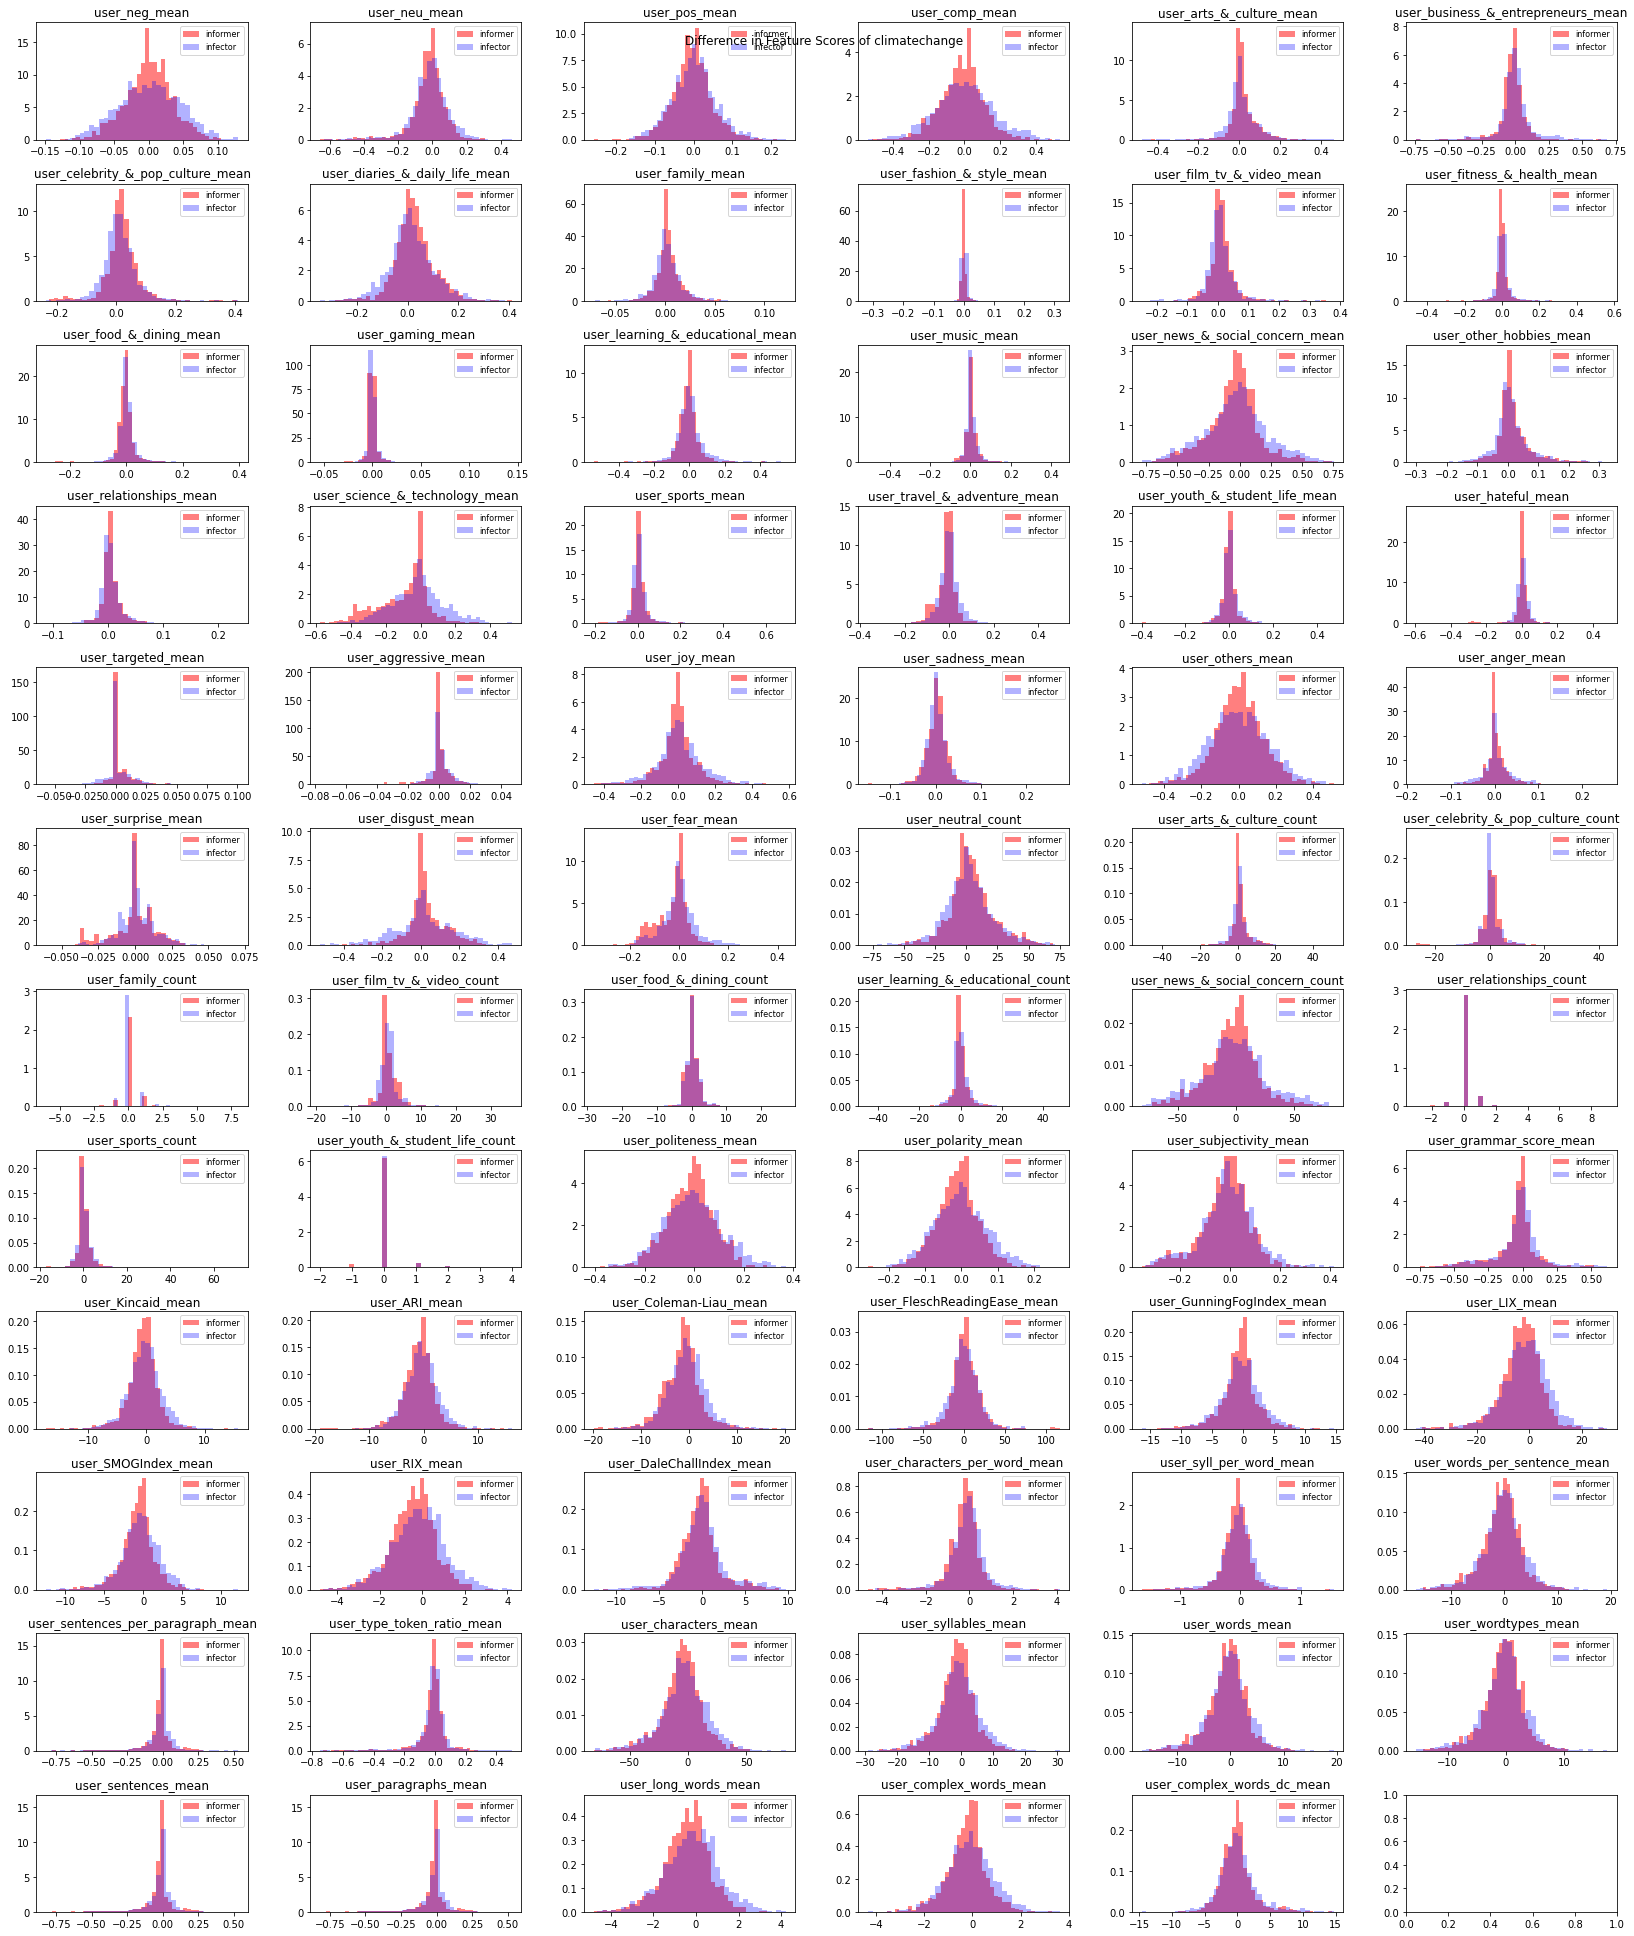

KeyboardInterrupt: ignored

In [ ]:
# HISTOGRAMS


import numpy as np
import matplotlib.pyplot as plt

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

for hashtag in hashtags : 
    
    fig, axes = plt.subplots(12,6, figsize=(23, 27))

    fig.suptitle(f'Difference in Feature Scores of {hashtag}\n\n')

    data = all_udf[all_udf['hashtag']==hashtag]

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]


    ax = axes.ravel()                     # flatten the 2D array

    for i, col in enumerate(cols):                   # for each of the 30 features
        bins = 40
        #---plot histogram for each feature---
        fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
        for_diff = targ[col].to_numpy() - form[col].to_numpy()
        
        ax[i].hist(fec_diff, bins=bins, color='r', alpha=.5, density=True)
        ax[i].hist(for_diff, bins=bins, color='b', alpha=0.3, density=True)
        #---set the title---
        ax[i].set_title(col, fontsize=12)    
        #---display the legend---
        ax[i].legend(['informer','infector'], loc='best', fontsize=8)
        
    plt.tight_layout()
    plt.show()

# ALL USERS CONSIDERED

In [ ]:
# all_udf.to_csv('multisource_analysis/score_db/best_informer_user_breakdown.csv')
all_udf = pd.read_csv('multisource_analysis/score_db/ALL_BEST_FEATURES.csv')
cols = all_udf.columns.to_list()
[ cols.remove(x) for x in ['Unnamed: 0']]
[ cols.remove(x) for x in ['is-infector','is-informer','is-target', 'hashtag']]
[ cols.remove(x) for x in cols if 'count' in x ]
cols = [ x for x in cols if 'user' in x]

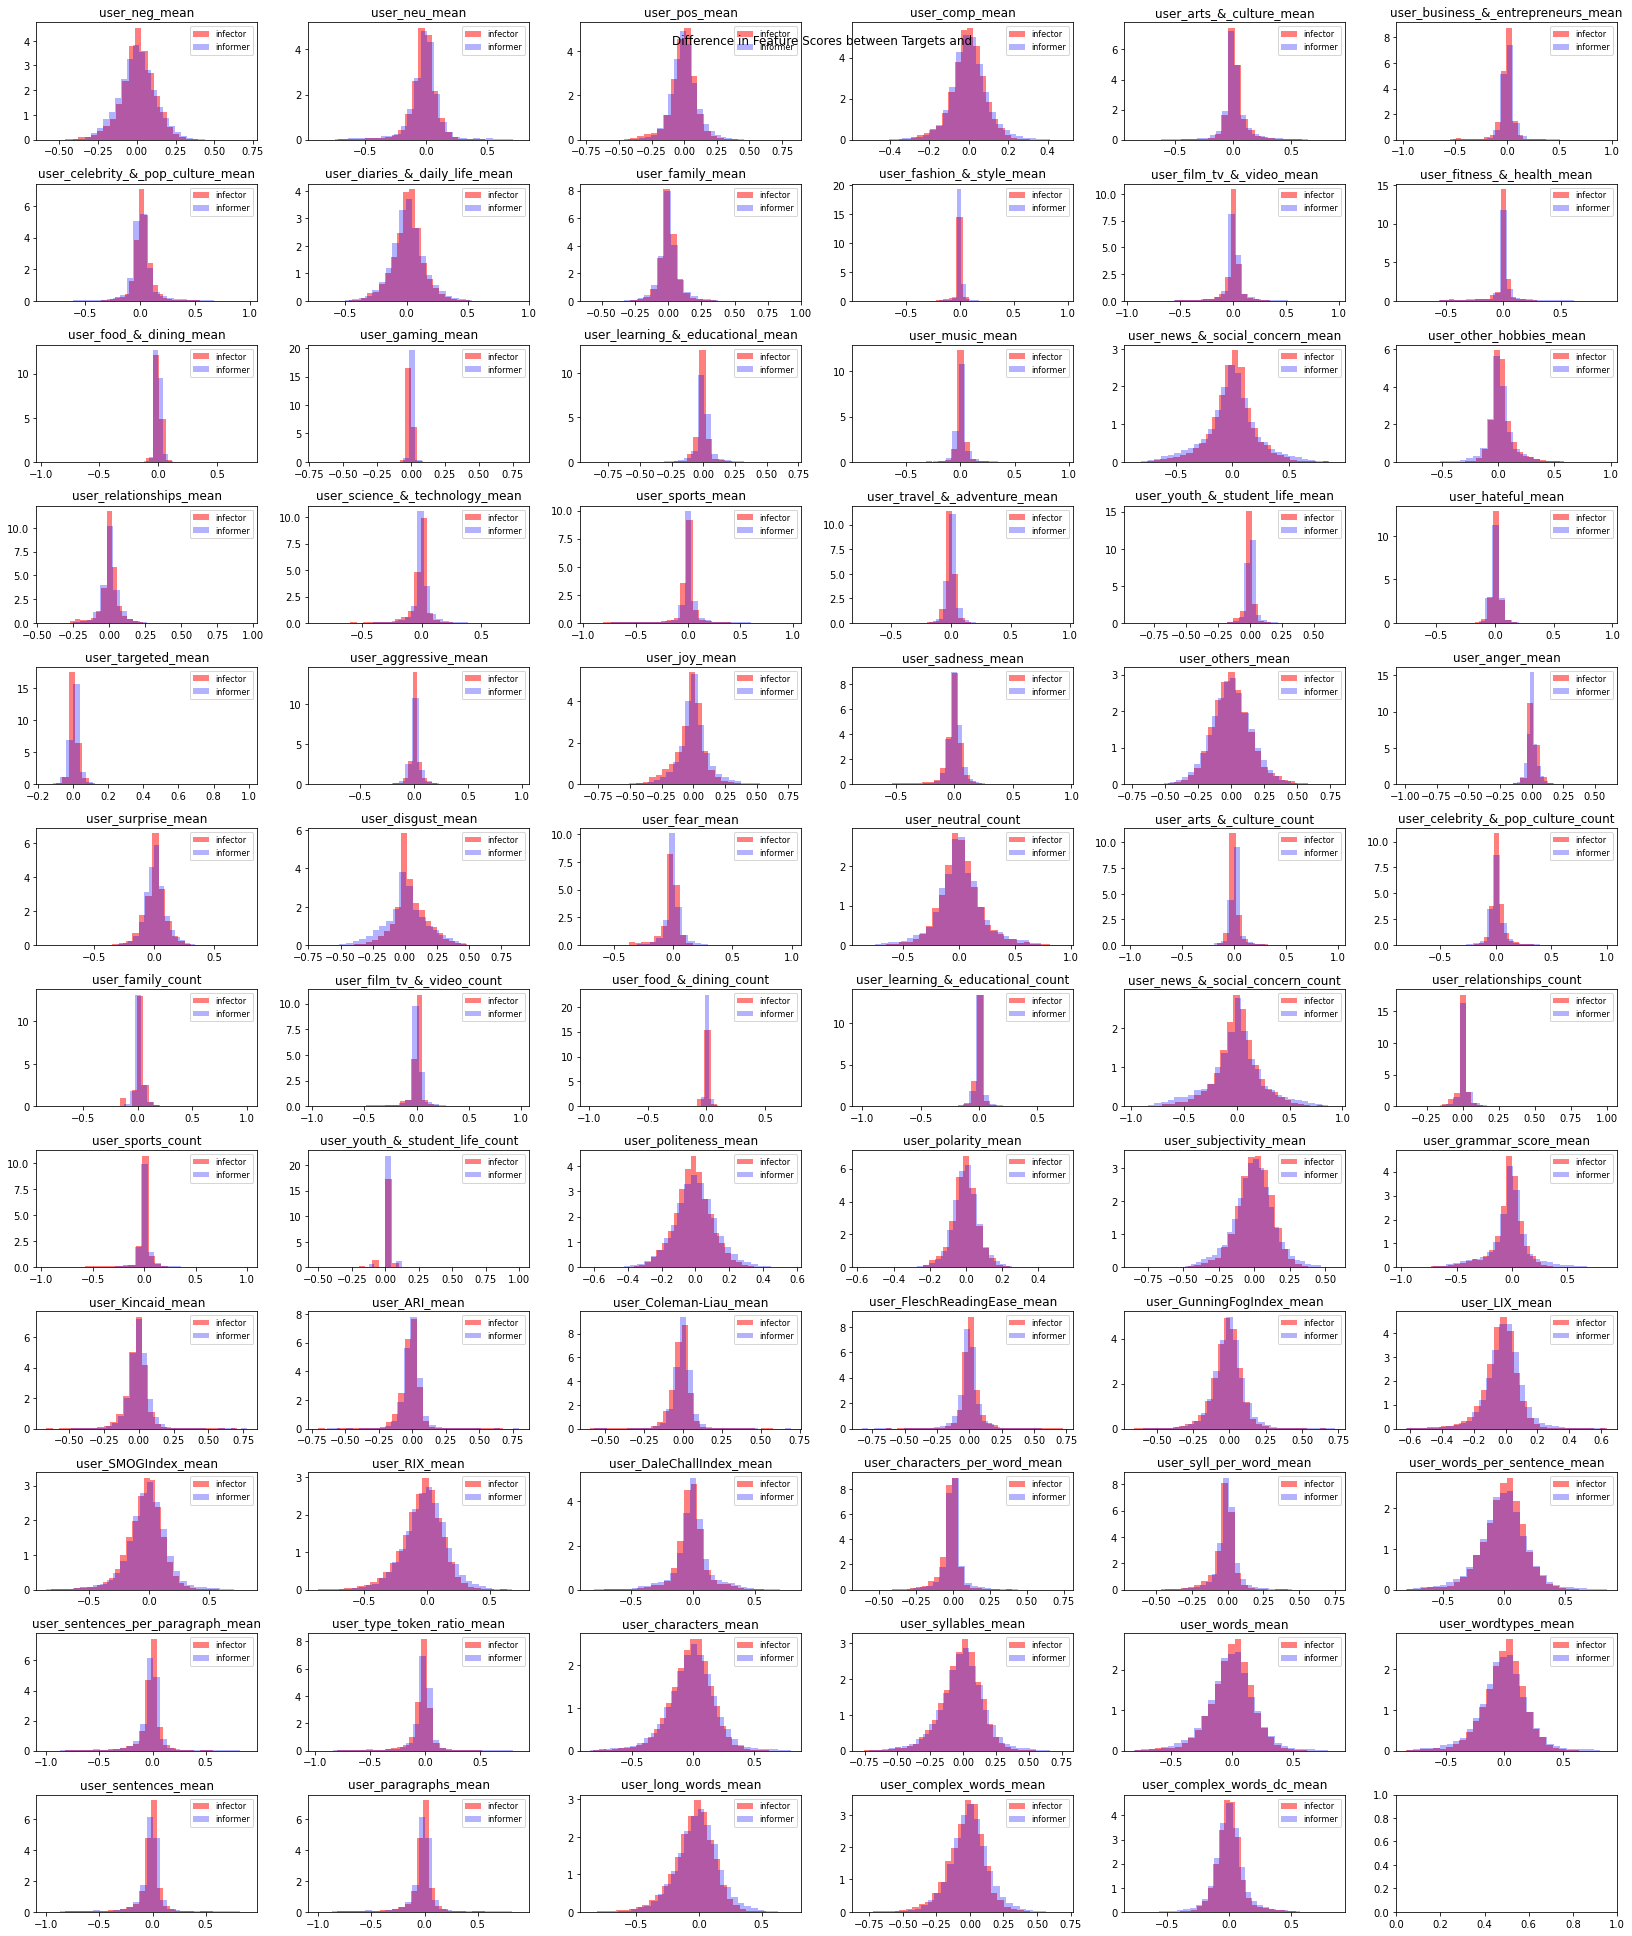

In [ ]:
# HISTOGRAMS

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = all_udf.copy()

x = data[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data[cols] = x_scaled


fig, axes = plt.subplots(12,6, figsize=(23, 27))

fig.suptitle(f'Difference in Feature Scores between Targets and \n\n')

form = data[data['is-informer']==1]
inf = data[data['is-infector']==1]
targ = data[data['is-target']==1]


ax = axes.ravel()                     # flatten the 2D array

for i, col in enumerate(cols):                   # for each of the 30 features
    bins = 30
    #---plot histogram for each feature---
    fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
    for_diff = targ[col].to_numpy() - form[col].to_numpy()
    
    ax[i].hist(fec_diff, bins=bins, color='r', alpha=.5, density=True)
    ax[i].hist(for_diff, bins=bins, color='b', alpha=0.3, density=True)
    #---set the title---
    ax[i].set_title(col, fontsize=12)    
    #---display the legend---
    ax[i].legend(['infector','informer'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

# TABLE OF DIFFERENECES

In [ ]:
# TABLE 


import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn import preprocessing

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

for j,hashtag in enumerate(hashtags) : 

    data = all_udf[all_udf['hashtag']==hashtag]

    x = data[cols].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data[cols] = x_scaled

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]

    f_euc = []
    f_cos = []
    m_euc = []
    m_cos = []

    for i, col in enumerate(all_types):                   # for each of the 30 features

        if len(col) == 1: 
            fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
            for_diff = targ[col].to_numpy() - form[col].to_numpy()
            
            if fec_diff.mean() > for_diff.mean():
                row.append( 'informer' )
            else: 
                row.append( 'infector' )
        else:
            n = len(form)
            f_euc. append( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(),inf[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            f_cos. append( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), inf[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            m_euc. append( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(),form[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            m_cos. append( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )



    
    e_df = pd.DataFrame([ ['infector'] + f_euc, ['informer'] + m_euc])
    e_df.columns = ['type','sentiment','topic','hatefullness','emotions']#,'readability','politeness','polarity','grammar','subjectivity']
    e_df.insert(0,column = 'hashtag', value= hashtag )

    c_df = pd.DataFrame([['infector'] + f_cos, ['informer']+m_cos])
    c_df.columns = ['type','sentiment','topic','hatefullness','emotions']#,'readability','politeness','polarity','grammar','subjectivity']
    c_df.insert(0,column = 'hashtag', value= hashtag )

    if j==0:
        all_euc_scores = e_df.copy()
        all_cos_scores = c_df.copy()
    else:
        all_euc_scores = pd.concat( [all_euc_scores, e_df], axis = 0)
        all_cos_scores = pd.concat( [all_cos_scores, c_df], axis = 0)
    
    print(f'added {hashtag} to consideration')

In [ ]:
# all_euc_scores.to_csv('diss_figs/user_scores_difference.csv')
all_euc_scores

,hashtag,type,sentiment,topic,hatefullness,emotions
0,avengers,infector,0.224256,0.484396,0.107883,0.344086
1,avengers,informer,0.244183,0.608356,0.110392,0.341408
0,blm,infector,0.250778,0.464813,0.139218,0.383536
1,blm,informer,0.217244,0.441871,0.149644,0.337541
0,brexit,infector,0.185096,0.465654,0.166021,0.374490
1,brexit,informer,0.172745,0.404373,0.177202,0.332823
0,climatechange,infector,0.215997,0.470087,0.089777,0.379641
1,climatechange,informer,0.273390,0.538011,0.108453,0.454902
0,covid,infector,0.191518,0.372045,0.093686,0.311984
1,covid,informer,0.288284,0.502507,0.117703,0.426280


# histograms of difference of feature vectors PER HASHTAG

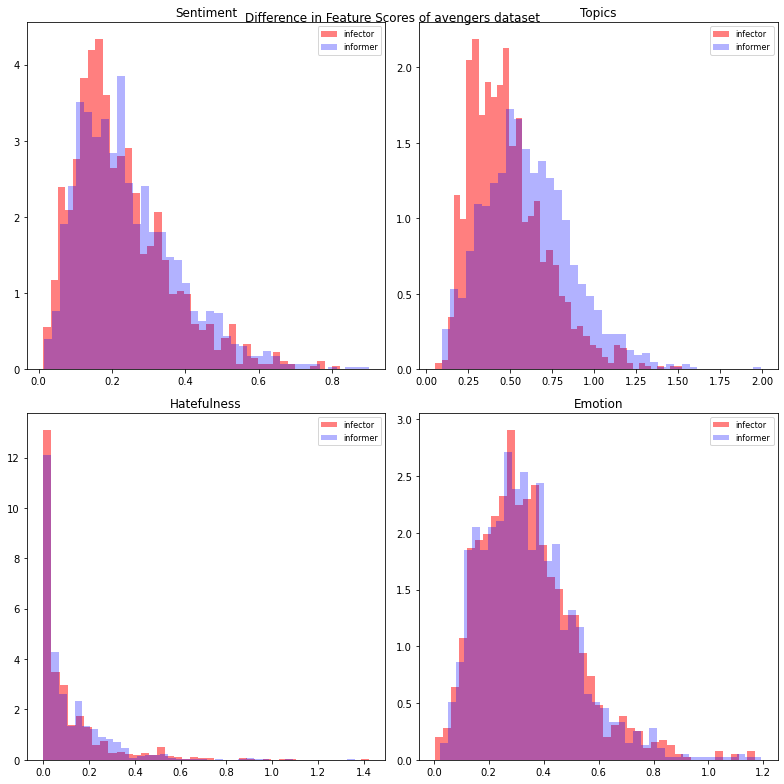

added avengers to consideration


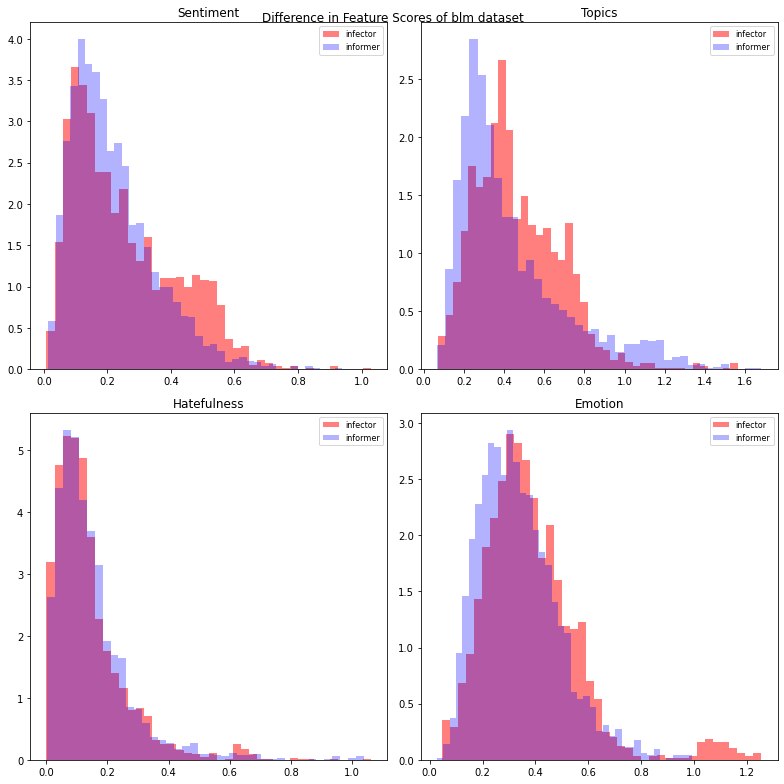

added blm to consideration


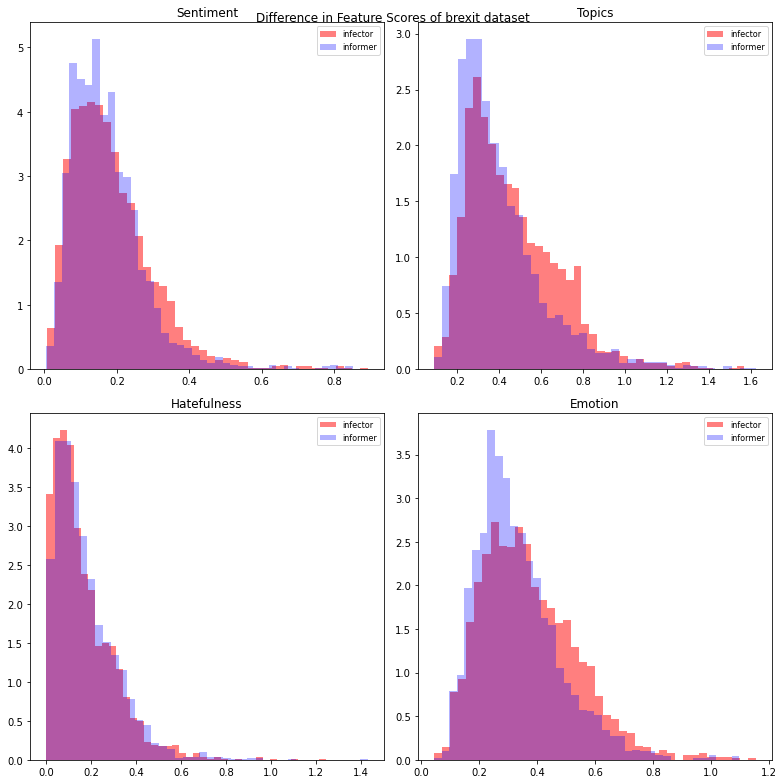

added brexit to consideration


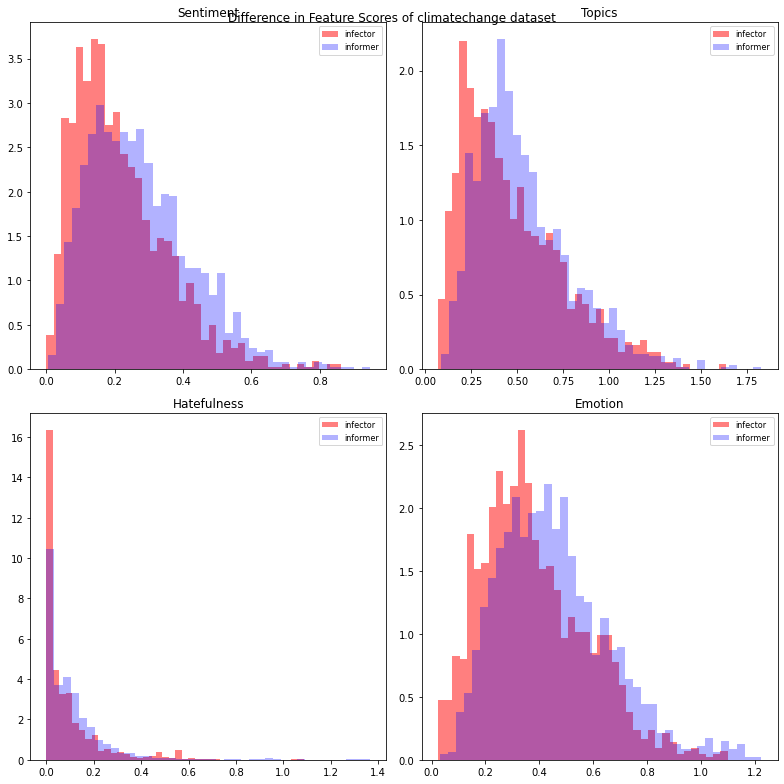

added climatechange to consideration


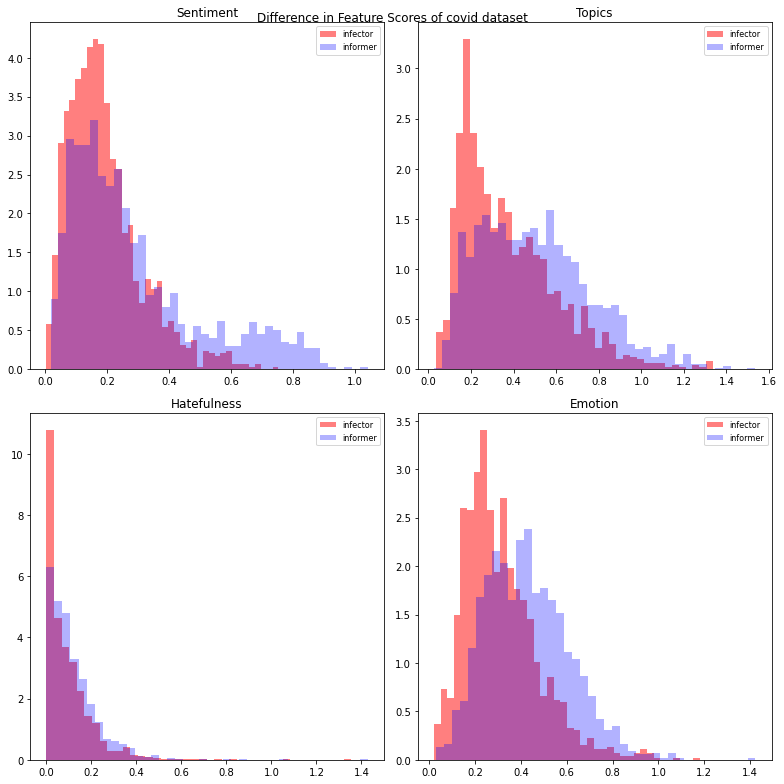

added covid to consideration


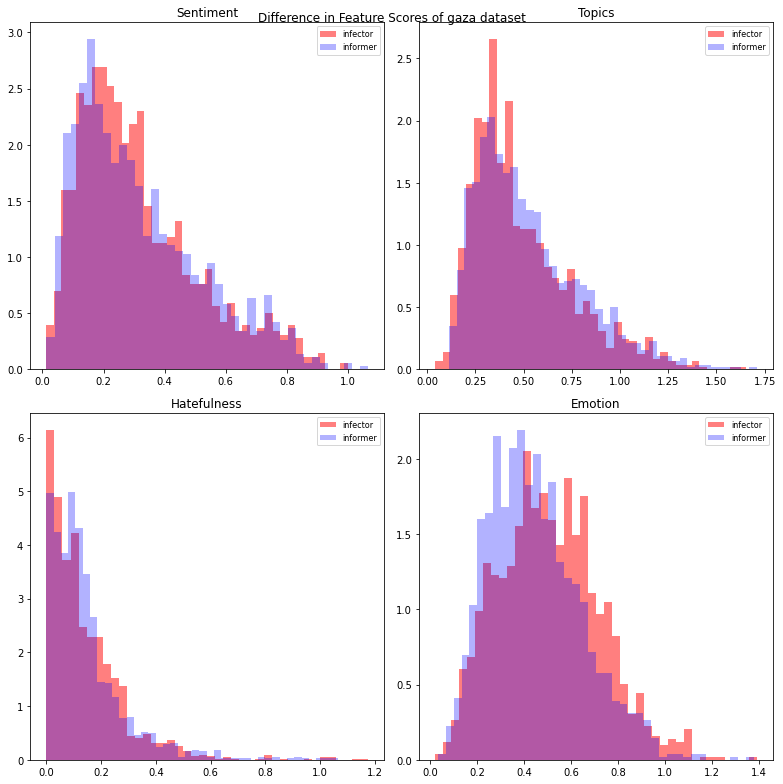

added gaza to consideration


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


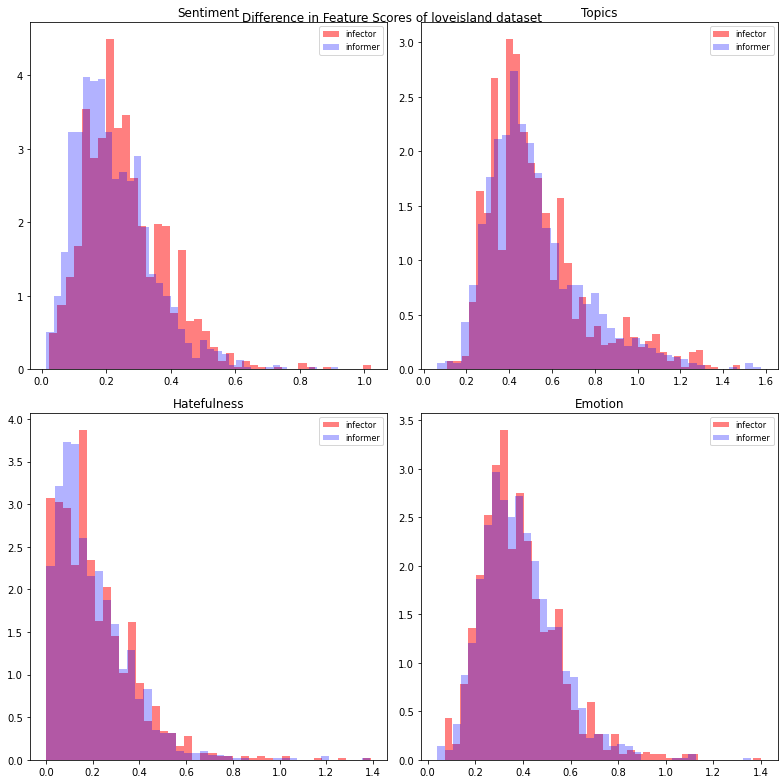

added loveisland to consideration


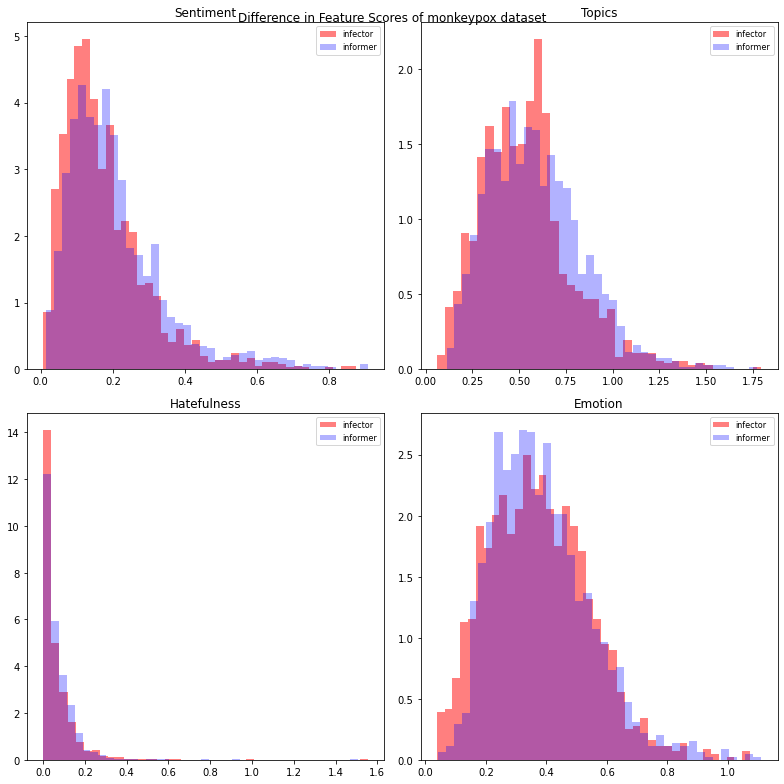

added monkeypox to consideration


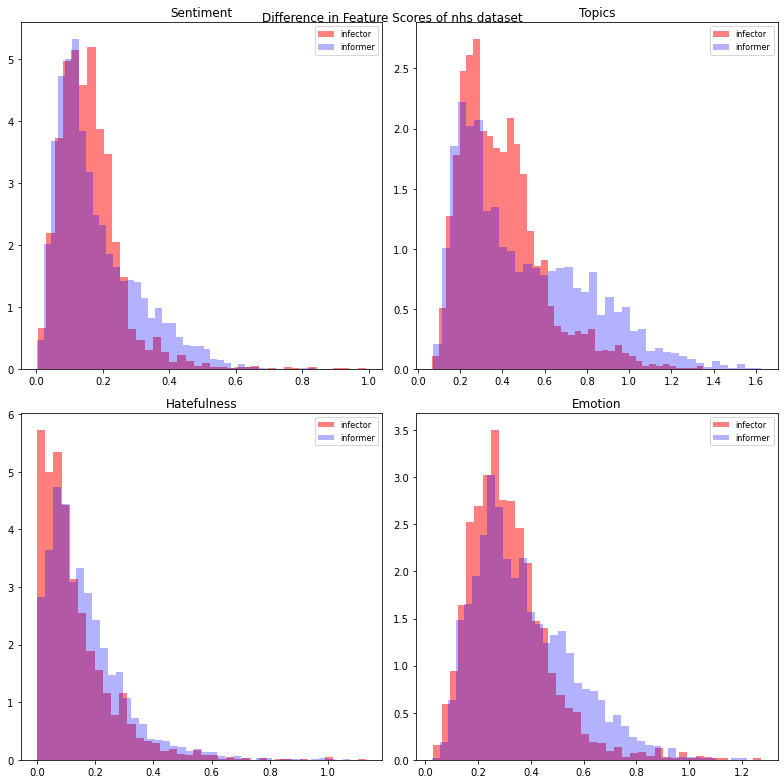

added nhs to consideration


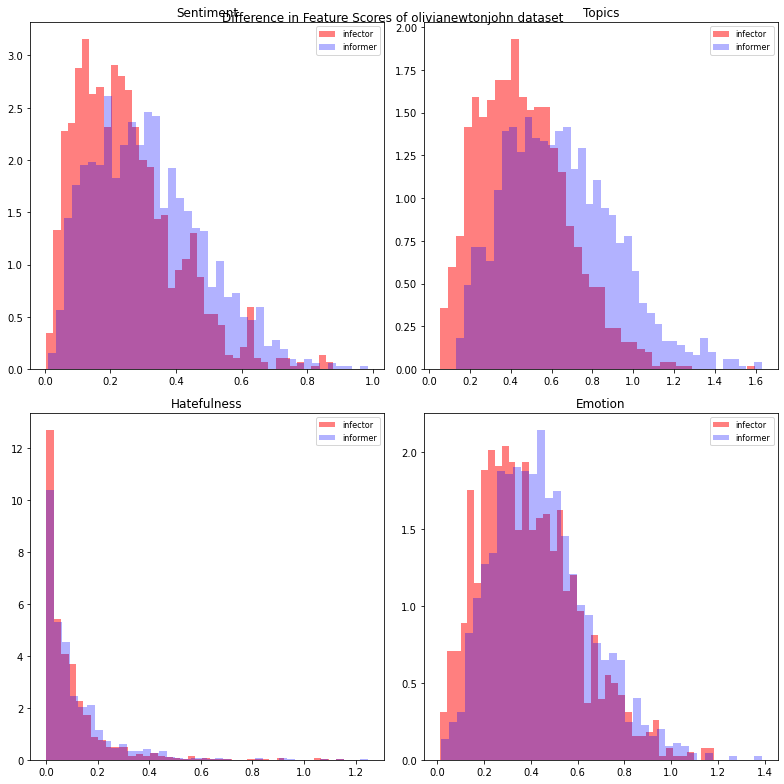

added olivianewtonjohn to consideration


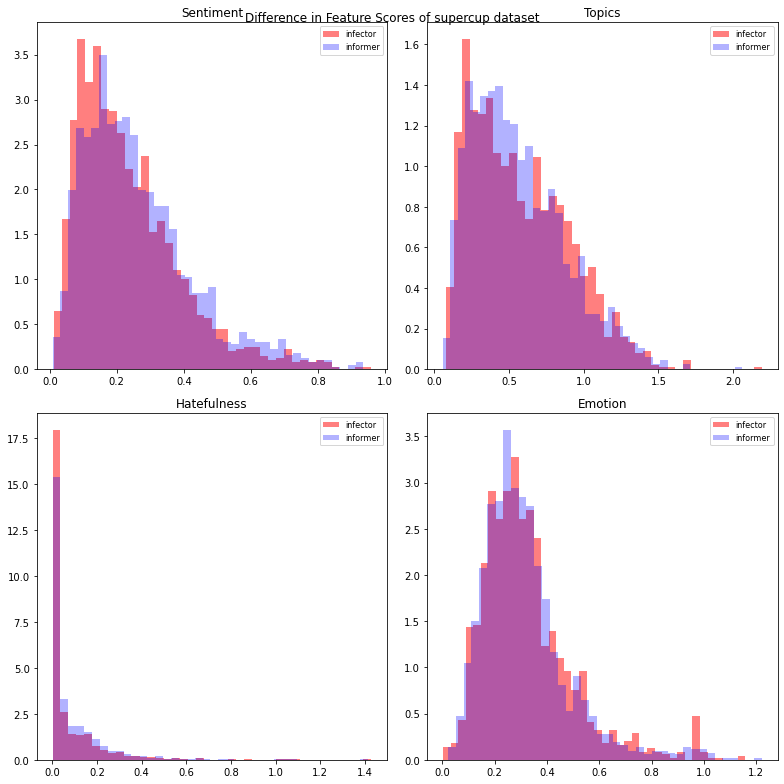

added supercup to consideration


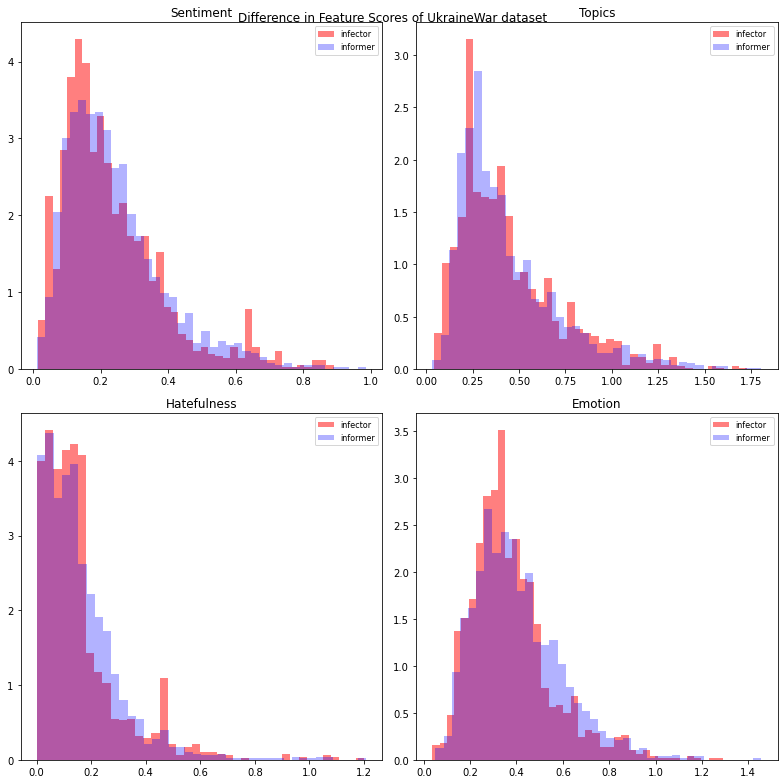

added UkraineWar to consideration


In [ ]:
# TABLE 


import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn import preprocessing

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

bins = 40

for j,hashtag in enumerate(hashtags) : 

    data = all_udf.copy()[all_udf['hashtag']==hashtag]

    fig, axes = plt.subplots(2,2, figsize=(11, 11))

    fig.suptitle(f'Difference in Feature Scores of {hashtag} dataset\n\n\n\n\n')

    x = data.copy()[cols].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data[cols] = x_scaled

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]

    f_euc = []
    f_cos = []
    m_euc = []
    m_cos = []
    
    ax = axes.ravel()

    title_names = ['Sentiment','Topics','Hatefulness','Emotion']

    for i, col in enumerate(all_types):                   # for each of the 30 features

        n = len(form)

        f_euc = np.array([ distance.euclidean(targ.copy()[col].iloc[i].to_numpy(),inf.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
        m_euc = np.array([ distance.euclidean(targ.copy()[col].iloc[i].to_numpy(),form.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
        # f_cos = ( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 
        # m_cos = ( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 

        ax[i].hist(f_euc, bins=bins, color='r', alpha=.5, density=True)
        ax[i].hist(m_euc, bins=bins, color='b', alpha=0.3, density=True)
        #---set the title---
        ax[i].set_title(title_names[i], fontsize=12)    
        #---display the legend---
        ax[i].legend(['infector','informer'], loc='best', fontsize=8)

    plt.tight_layout()
    plt.show()
    
    print(f'added {hashtag} to consideration')

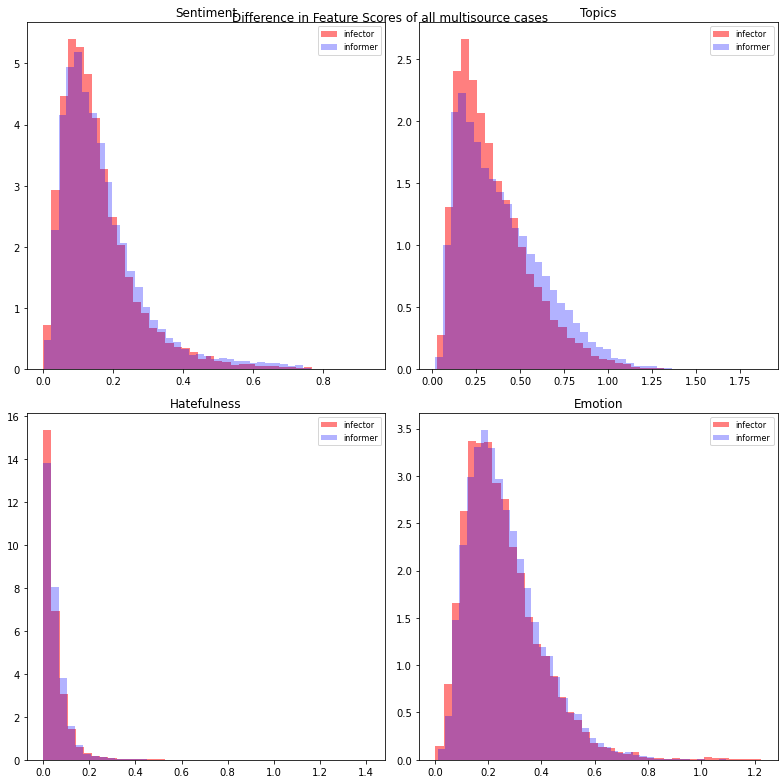

In [ ]:
# TABLE 


import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn import preprocessing

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

bins = 40

data = all_udf.copy()

fig, axes = plt.subplots(2,2, figsize=(11, 11))

fig.suptitle(f'Difference in Feature Scores of all multisource cases \n\n\n\n\n')

x = data.copy()[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data[cols] = x_scaled

form = data[data['is-informer']==1]
inf = data[data['is-infector']==1]
targ = data[data['is-target']==1]

f_euc = []
f_cos = []
m_euc = []
m_cos = []

ax = axes.ravel()

title_names = ['Sentiment','Topics','Hatefulness','Emotion']

for i, col in enumerate(all_types):                   # for each of the 30 features

    n = len(form)

    f_euc = np.array([ distance.euclidean(targ.copy()[col].iloc[i].to_numpy(),inf.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
    m_euc = np.array([ distance.euclidean(targ.copy()[col].iloc[i].to_numpy(),form.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
    # f_cos = ( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 
    # m_cos = ( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 

    ax[i].hist(f_euc, bins=bins, color='r', alpha=.5, density=True)
    ax[i].hist(m_euc, bins=bins, color='b', alpha=0.3, density=True)
    #---set the title---
    ax[i].set_title(title_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['infector','informer'], loc='best', fontsize=8)
    ax[i].set_xlabel('Difference')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


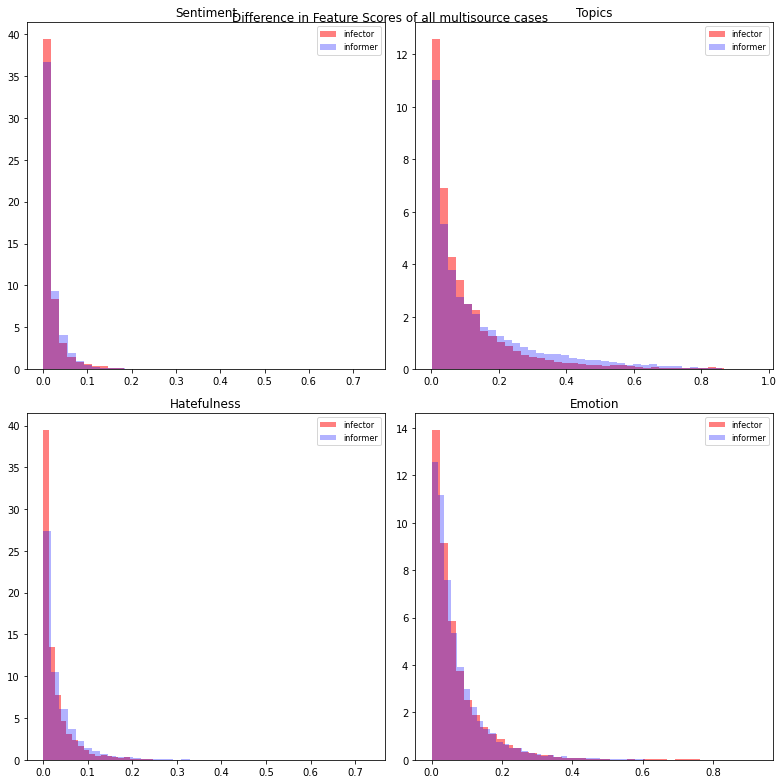

In [ ]:
# TABLE 

## COSINE DISTANCE

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn import preprocessing

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

bins = 40

data = all_udf.copy()

fig, axes = plt.subplots(2,2, figsize=(11, 11))

fig.suptitle(f'Difference in Feature Scores of all multisource cases \n\n\n\n\n')

x = data.copy()[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data[cols] = x_scaled

form = data[data['is-informer']==1]
inf = data[data['is-infector']==1]
targ = data[data['is-target']==1]

f_euc = []
f_cos = []
m_euc = []
m_cos = []

ax = axes.ravel()

title_names = ['Sentiment','Topics','Hatefulness','Emotion']

for i, col in enumerate(all_types):                   # for each of the 30 features

    n = len(form)

    f_euc = np.array([ distance.cosine(targ.copy()[col].iloc[i].to_numpy(),inf.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
    m_euc = np.array([ distance.cosine(targ.copy()[col].iloc[i].to_numpy(),form.copy()[col].iloc[i].to_numpy()) for i in range(n) ])
    # f_cos = ( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 
    # m_cos = ( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ) 

    ax[i].hist(f_euc, bins=bins, color='r', alpha=.5, density=True)
    ax[i].hist(m_euc, bins=bins, color='b', alpha=0.3, density=True)
    #---set the title---
    ax[i].set_title(title_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['infector','informer'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

# HISTOGRAM OF SCORES PER HASHTAG

In [5]:
# all_udf.to_csv('multisource_analysis/score_db/best_informer_user_breakdown.csv')
all_udf = pd.read_csv('multisource_analysis/score_db/ALL_BEST_FEATURES.csv')
cols = all_udf.columns.to_list()
[ cols.remove(x) for x in ['Unnamed: 0']]
[ cols.remove(x) for x in ['is-infector','is-informer','is-target', 'hashtag']]
[ cols.remove(x) for x in cols if 'count' in x ]
cols = [ x for x in cols if 'user' in x]

In [ ]:
topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

cols = [ x for x in cols if x not in topics ]

In [ ]:
# HISTOGRAMS


import numpy as np
import matplotlib.pyplot as plt

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

for hashtag in hashtags : 
    
    fig, axes = plt.subplots(12,6, figsize=(23, 27))

    fig.suptitle(f'Scores of users from {hashtag}\n\n')

    data = all_udf[all_udf['hashtag']==hashtag]

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]


    ax = axes.ravel()                     # flatten the 2D array

    for i, col in enumerate(cols):                   # for each of the 30 features
        bins = 40
        #---plot histogram for each feature---
        fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
        for_diff = targ[col].to_numpy() - form[col].to_numpy()
        
        ax[i].hist(fec_diff, bins=bins, color='r', alpha=.5, density=True)
        ax[i].hist(for_diff, bins=bins, color='b', alpha=0.3, density=True)
        #---set the title---
        ax[i].set_title(col, fontsize=12)    
        #---display the legend---
        ax[i].legend(['informer','infector'], loc='best', fontsize=8)
        
    plt.tight_layout()
    plt.show()